In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
actions = [
    'come',
    'away',
    'spin'
]

data = np.concatenate([
    np.load('dataset/seq_question_1658689312.npy'),
    np.load('dataset/seq_cant listen_1658689312.npy'),
    np.load('dataset/seq_cant watch_1658689312.npy')
], axis=0)

data.shape

(2019, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2019, 30, 99)
(2019,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2019, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1817, 30, 99) (1817, 3)
(202, 30, 99) (202, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
57/57 [==============================] - ETA: 0s - loss: 21.0683 - acc: 0.5465
Epoch 1: val_acc improved from -inf to 0.46040, saving model to models\model.h5
57/57 [==============================] - 3s 24ms/step - loss: 21.0683 - acc: 0.5465 - val_loss: 67.2752 - val_acc: 0.4604 - lr: 0.0010
Epoch 2/200
56/57 [============================>.] - ETA: 0s - loss: 27.2577 - acc: 0.5988
Epoch 2: val_acc improved from 0.46040 to 0.83663, saving model to models\model.h5
57/57 [==============================] - 1s 17ms/step - loss: 26.9976 - acc: 0.6026 - val_loss: 7.8954 - val_acc: 0.8366 - lr: 0.0010
Epoch 3/200
57/57 [==============================] - ETA: 0s - loss: 17.5199 - acc: 0.7727
Epoch 3: val_acc did not improve from 0.83663
57/57 [==============================] - 1s 16ms/step - loss: 17.5199 - acc: 0.7727 - val_loss: 22.4522 - val_acc: 0.6832 - lr: 0.0010
Epoch 4/200
57/57 [==============================] - ETA: 0s - loss: 27.1667 - acc: 0.6329
Epoch 4: val_acc did no

Epoch 31/200
56/57 [============================>.] - ETA: 0s - loss: 4.7795 - acc: 0.6066
Epoch 31: val_acc did not improve from 0.88614
57/57 [==============================] - 1s 18ms/step - loss: 4.7679 - acc: 0.6048 - val_loss: 10.3088 - val_acc: 0.6436 - lr: 0.0010
Epoch 32/200
56/57 [============================>.] - ETA: 0s - loss: 4.7731 - acc: 0.6027
Epoch 32: val_acc did not improve from 0.88614
57/57 [==============================] - 1s 17ms/step - loss: 4.9141 - acc: 0.6026 - val_loss: 12.1387 - val_acc: 0.6683 - lr: 0.0010
Epoch 33/200
57/57 [==============================] - ETA: 0s - loss: 4.0876 - acc: 0.6439
Epoch 33: val_acc did not improve from 0.88614
57/57 [==============================] - 1s 17ms/step - loss: 4.0876 - acc: 0.6439 - val_loss: 8.4079 - val_acc: 0.6931 - lr: 0.0010
Epoch 34/200
55/57 [===========================>..] - ETA: 0s - loss: 5.1818 - acc: 0.6176
Epoch 34: val_acc did not improve from 0.88614
57/57 [==============================] - 1s 18m

Epoch 61/200
57/57 [==============================] - ETA: 0s - loss: 0.6427 - acc: 0.9345
Epoch 61: val_acc improved from 0.96535 to 0.97030, saving model to models\model.h5
57/57 [==============================] - 1s 16ms/step - loss: 0.6427 - acc: 0.9345 - val_loss: 0.1271 - val_acc: 0.9703 - lr: 0.0010
Epoch 62/200
57/57 [==============================] - ETA: 0s - loss: 1.3259 - acc: 0.8872
Epoch 62: val_acc did not improve from 0.97030
57/57 [==============================] - 1s 15ms/step - loss: 1.3259 - acc: 0.8872 - val_loss: 8.6723 - val_acc: 0.7277 - lr: 0.0010
Epoch 63/200
57/57 [==============================] - ETA: 0s - loss: 1.3386 - acc: 0.8778
Epoch 63: val_acc did not improve from 0.97030
57/57 [==============================] - 1s 15ms/step - loss: 1.3386 - acc: 0.8778 - val_loss: 0.5679 - val_acc: 0.9356 - lr: 0.0010
Epoch 64/200
57/57 [==============================] - ETA: 0s - loss: 1.9460 - acc: 0.7843
Epoch 64: val_acc did not improve from 0.97030
57/57 [=====

57/57 [==============================] - ETA: 0s - loss: 0.7138 - acc: 0.9488
Epoch 91: val_acc did not improve from 0.97030
57/57 [==============================] - 1s 15ms/step - loss: 0.7138 - acc: 0.9488 - val_loss: 1.1782 - val_acc: 0.8119 - lr: 0.0010
Epoch 92/200
57/57 [==============================] - ETA: 0s - loss: 4.4042 - acc: 0.8129
Epoch 92: val_acc did not improve from 0.97030
57/57 [==============================] - 1s 15ms/step - loss: 4.4042 - acc: 0.8129 - val_loss: 3.3388 - val_acc: 0.6386 - lr: 0.0010
Epoch 93/200
57/57 [==============================] - ETA: 0s - loss: 6.0625 - acc: 0.7578
Epoch 93: val_acc did not improve from 0.97030
57/57 [==============================] - 1s 15ms/step - loss: 6.0625 - acc: 0.7578 - val_loss: 0.3116 - val_acc: 0.9455 - lr: 0.0010
Epoch 94/200
57/57 [==============================] - ETA: 0s - loss: 0.2959 - acc: 0.9582
Epoch 94: val_acc improved from 0.97030 to 0.97525, saving model to models\model.h5
57/57 [==================

Epoch 121/200
56/57 [============================>.] - ETA: 0s - loss: 0.3121 - acc: 0.9743
Epoch 121: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 17ms/step - loss: 0.3226 - acc: 0.9730 - val_loss: 0.9399 - val_acc: 0.9703 - lr: 0.0010
Epoch 122/200
57/57 [==============================] - ETA: 0s - loss: 0.3742 - acc: 0.9730
Epoch 122: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 15ms/step - loss: 0.3742 - acc: 0.9730 - val_loss: 0.9019 - val_acc: 0.9505 - lr: 0.0010
Epoch 123/200
57/57 [==============================] - ETA: 0s - loss: 0.2633 - acc: 0.9708
Epoch 123: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 15ms/step - loss: 0.2633 - acc: 0.9708 - val_loss: 0.3828 - val_acc: 0.9703 - lr: 0.0010
Epoch 124/200
57/57 [==============================] - ETA: 0s - loss: 0.2171 - acc: 0.9774
Epoch 124: val_acc did not improve from 0.98020
57/57 [==============================] - 

Epoch 151/200
57/57 [==============================] - ETA: 0s - loss: 0.2919 - acc: 0.9697
Epoch 151: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 15ms/step - loss: 0.2919 - acc: 0.9697 - val_loss: 0.4664 - val_acc: 0.9703 - lr: 5.0000e-04
Epoch 152/200
57/57 [==============================] - ETA: 0s - loss: 0.2581 - acc: 0.9571
Epoch 152: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 15ms/step - loss: 0.2581 - acc: 0.9571 - val_loss: 0.3206 - val_acc: 0.9604 - lr: 5.0000e-04
Epoch 153/200
57/57 [==============================] - ETA: 0s - loss: 0.2101 - acc: 0.9725
Epoch 153: val_acc did not improve from 0.98020
57/57 [==============================] - 1s 15ms/step - loss: 0.2101 - acc: 0.9725 - val_loss: 0.3374 - val_acc: 0.9604 - lr: 5.0000e-04
Epoch 154/200
57/57 [==============================] - ETA: 0s - loss: 0.1939 - acc: 0.9791
Epoch 154: val_acc did not improve from 0.98020
57/57 [======================

57/57 [==============================] - 1s 15ms/step - loss: 0.1198 - acc: 0.9851 - val_loss: 0.9477 - val_acc: 0.9653 - lr: 5.0000e-04
Epoch 181/200
57/57 [==============================] - ETA: 0s - loss: 0.2134 - acc: 0.9758
Epoch 181: val_acc did not improve from 0.99010
57/57 [==============================] - 1s 15ms/step - loss: 0.2134 - acc: 0.9758 - val_loss: 0.4606 - val_acc: 0.9505 - lr: 5.0000e-04
Epoch 182/200
57/57 [==============================] - ETA: 0s - loss: 0.0881 - acc: 0.9851
Epoch 182: val_acc did not improve from 0.99010
57/57 [==============================] - 1s 15ms/step - loss: 0.0881 - acc: 0.9851 - val_loss: 0.2620 - val_acc: 0.9752 - lr: 5.0000e-04
Epoch 183/200
57/57 [==============================] - ETA: 0s - loss: 0.1045 - acc: 0.9890
Epoch 183: val_acc did not improve from 0.99010
57/57 [==============================] - 1s 15ms/step - loss: 0.1045 - acc: 0.9890 - val_loss: 0.2956 - val_acc: 0.9802 - lr: 5.0000e-04
Epoch 184/200
57/57 [===========

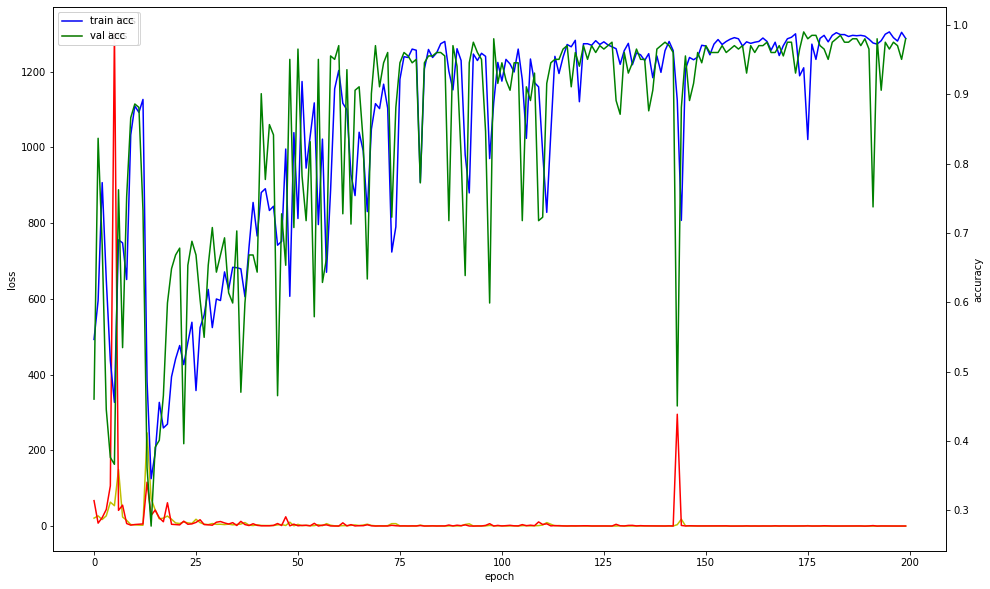

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

7/7 [==============================] - 0s 6ms/step


array([[[143,   2],
        [  0,  57]],

       [[129,   0],
        [  1,  72]],

       [[130,   0],
        [  1,  71]]], dtype=int64)